## Stardist benchmark

In [1]:
import raster_geometry as rg
import numpy as np
from tnia.simulation.phantoms import add_small_to_large_2d
import matplotlib.pyplot as plt
from tnia.plotting.plt_helper import imshow_multi2d
import math

## Make a super simple fake dataset

It only has 2 objects, object 1 with diameter of 6, object 2 with diameter of 140

-1.0 1.0


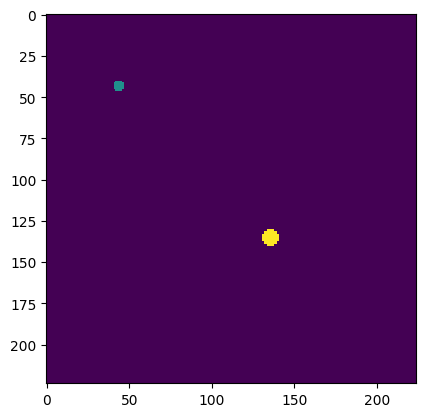

In [2]:
width, height = 224, 224

image = np.zeros([height, width], dtype=np.float32)
truth = np.zeros([height, width], dtype=np.float32)

x, y = 44, 44
r = 3 
size = [math.ceil(r*2), math.ceil(r*2)]
temp=rg.circle(size, r)
add_small_to_large_2d(image, temp, x, y, mode='replace_non_zero')
add_small_to_large_2d(truth, temp, x, y, mode='replace_non_zero')

x, y = 136, 136
r = 5 
size = [math.ceil(r*2), math.ceil(r*2)]
temp=rg.circle(size, r)
add_small_to_large_2d(image, temp, x, y, mode='replace_non_zero')
add_small_to_large_2d(truth, 2*temp, x, y, mode='replace_non_zero')

truth = truth - 1

plt.imshow(truth)

print(truth.min(), truth.max())

## Repeat the objects to make a fake training set

Just repeat a few times to make a trivial training set.  No need to even add blur or noise, we just want to see if a custom model can learn different scales. 

In [3]:
X = [image.copy().astype('float32')[..., np.newaxis] for i in range(10)]
Y = [truth.copy().astype('int16') for i in range(10)]

In [4]:
Y[0].min(), Y[0].max()

(-1, 1)

## Make a custom model

In [5]:
from stardist.models import StarDist2D, Config2D
from tnia.deeplearning.dl_helper import augmenter

n_channel_in = 1
n_rays = 32
axes = 'YX'
config = Config2D (n_rays=n_rays, axes=axes,n_channel_in=n_channel_in, train_patch_size = (224,224), unet_n_depth=3)

model_path = './erase_me'

model = StarDist2D(config=config, name="model1", basedir=model_path)


base_model.py (203): output path for model already exists, files may be overwritten: C:\Users\bnort\work\ImageJ2022\tnia\tnia-python\notebooks\imagesc\2024_06_24_stardist_benchmark\erase_me\model1


Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [6]:
X=np.array(X)
Y=np.array(Y)

In [7]:
X.dtype, Y.dtype

(dtype('float32'), dtype('int16'))

In [ ]:
import stardist
import tensorflow as tf
print (stardist.__version__)
print (tf.__version__)


# dplexbio311 45 seconds. 

model.train(X, Y, validation_data=(X,Y),epochs=5) 

0.9.1
2.10.1
Epoch 1/5
100/100 [==============================] - 18s 96ms/step - loss: 1.0309 - prob_loss: 0.4707 - dist_loss: 2.8009 - prob_kld: 0.0664 - dist_relevant_mae: 2.8008 - dist_relevant_mse: 12.4740 - dist_dist_iou_metric: 0.2864 - val_loss: 0.7247 - val_prob_loss: 0.4124 - val_dist_loss: 1.5617 - val_prob_kld: 0.0081 - val_dist_relevant_mae: 1.5617 - val_dist_relevant_mse: 4.1664 - val_dist_dist_iou_metric: 0.5158 - lr: 3.0000e-04
Epoch 2/5
 39/100 [==========>...................] - ETA: 4s - loss: 0.6669 - prob_loss: 0.4120 - dist_loss: 1.2743 - prob_kld: 0.0077 - dist_relevant_mae: 1.2743 - dist_relevant_mse: 3.1494 - dist_dist_iou_metric: 0.5866

In [21]:
for y in Y:
    print(y.min())

65525
65525
65525
65525
65525
65525
65525
65525
65525
65525
